In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style('white')

In [2]:
year = 2019
ticker = 'IFM'

col_names=['TIME', 'X', 'Y', 'Z'] 

df = pd.read_csv(os.path.join(f'../data/index/{year}/{ticker}.csv'), index_col=0, encoding='gbk')
df.columns = ['code', 'time', 'open', 'high', 'low', 'close', 'volume', 'turnover', 'open interest']

df.rename_axis("type", axis='index', inplace=True)
df['time'] = pd.to_datetime(df['time'])

df.reset_index(inplace=True)

df = df.iloc[0:100, :]
df.head(1000)

,type,code,time,open,high,low,close,volume,turnover,open interest
0,SF,IF1901,2019-01-02 09:31:00,3012.4,3013.2,3008.0,3008.6,1021.0,922330440.0,49161
1,SF,IF1901,2019-01-02 09:32:00,3008.6,3009.2,3006.8,3007.8,503.0,453875220.0,48889
2,SF,IF1901,2019-01-02 09:33:00,3007.6,3010.8,3007.4,3010.2,363.0,327685260.0,48727
3,SF,IF1901,2019-01-02 09:34:00,3010.4,3010.8,3003.6,3004.2,554.0,499784340.0,48430
4,SF,IF1901,2019-01-02 09:35:00,3004.2,3006.0,3003.2,3003.6,326.0,293845920.0,48235
...,...,...,...,...,...,...,...,...,...,...
95,SF,IF1901,2019-01-02 11:06:00,2967.4,2967.4,2962.8,2964.6,197.0,175200120.0,44586
96,SF,IF1901,2019-01-02 11:07:00,2964.8,2965.8,2963.0,2964.0,140.0,124488540.0,44592
97,SF,IF1901,2019-01-02 11:08:00,2964.0,2965.4,2963.4,2964.8,56.0,49803600.0,44607
98,SF,IF1901,2019-01-02 11:09:00,2964.8,2966.8,2963.6,2963.8,127.0,112964220.0,44636


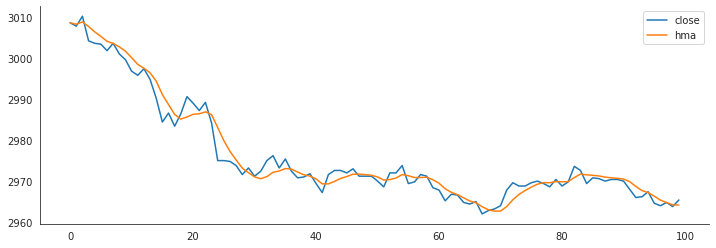

In [3]:
period = 10

df['window_t_ewm'] = df['close'].ewm(span=period).mean()
df['window_half_ewm'] = df['close'].ewm(span=period/2).mean()
df['diff']=df['window_half_ewm'] * 2 - df['window_t_ewm']
df['hma']=df['diff'].ewm(span=int(math.sqrt(period))).mean()

df[['close', 'hma']].plot(grid=False, figsize=(12,4))
sns.despine()